<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools, Midterm</div>
<div style="text-align: right">Dino Konstantopoulos, 1 November 2018</div>

A big part of Data Science in market economies is analysis of returns in the stock market. We did not do any financial analysis in class, and it is an important domain in Data Science, so we are going to use the midterm to do Data science with the US Stock Market.

<br />
<center>
<img src = "ipynb.images/stockmarketanalysis.jpg" width = 300 />
</center>

There is not enough time to do deep data science in a midterm, so there will be an in-class and a take-home portion in this open book/open Web part of the midterm. You have about two hours for the in-class portion, and a week for the take-home portion. *You may not discuss or collaborate for neither the in-class nor take-home portions*. Any similarities between answers will be construed as cheating, and you will get an "F" grade. If you reference work on the Web, which you *absolutely can*, always include the reference URL.

There are 4 main sections in this notebook. The first section is an in-class section. The second section has an in-class **and** a take-home part. The third section is all in-class again. And the fourth section is all take-home. Note the grade point distribution per section. 

Don't panic, this midterm is tough. Be methodical and analytic. We tackled similar types of problems in class. Revisit them. This is a weighted midterm. You just need to do better than the class average. Good luck!

<br />
<div style="text-align: right; color: gray">**Question 1 (in-class: 25 points)**</div>

# 1. The Value (and illegality) of Insider Information

<br />
<center>
<img src = "ipynb.images/insider-trading.jpg" width = 300 />
</center>

Insider information is a non-public fact regarding the plans or condition of a publicly traded company that could provide a financial advantage when used to buy or sell shares of that or another company's securities. Knowing about a company's significant, confidential corporate developments, such as the release of a new product, could provide an unfair advantage if the information is not public, that is, if only a few people know about the developments. Insider information is typically gained by someone who is working within or close to a listed company.

Insider trading is **illegal** when the material information has not been made public and has been traded on. This is because trading on insider information is seen as an unfair manipulation of the free market to give preference to specific parties. It undermines general investor confidence in the integrity of the market and can dampen economic growth. 

Privately owned companies are not required by law to disclose detailed financial and operating information in most instances. They may shield information from public knowledge and determine for themselves who needs to know specific types of information. Companies that are publicly owned, on the other hand, are subject to detailed disclosure laws about their financial condition, operating results, management compensation, and other areas of their business. 

Publicly owned companies prepare two annual reports, one for the SEC and one for their shareholders. You are not a shareholder yet, but you have a friend that is, and she said she is going to let you into any of the three companies' shareholder meetings, and that will help you make a better investment. 

> *With your first salary as an intern, you narrow down your investment to stock in 3 companies: Apple, Amazon, and Samsung. Their annual shareholder disclosures are scheduled for next week, on Monday, Tuesday, and Wednesday, one day per company,  not necessarily in that order. You don't know which company on what day. But you need to schedule time off of work for next week so that your friend can let you into the meeting. You **really** want to invest in Apple, and you guess Monday will be the shareholder disclosure meeting for Apple and plan to take time off from work on Monday, to go to the meeting. Then your friend calls you on the weekend prior with insider information: The Amazon shareholder disclosure meeting definitely can't be on Monday because she knows Jeff Bezos is vacationing in [Greece](http://time.com/money/5406306/the-29000-secret-that-makes-this-greek-hotel-so-instagrammable/) next weekend and needs to fly back to the US next Monday, so cannot be at any meeting, and there cannot be a shareholder meeting without its CEO. Should you go ahead with taking time off as originally planned, or switch to another day, all in the hopes of attending Apple's shareholder meeting?*

In the notebook, cleary define outcomes and sample space and leverage the counting framework we introduced in class, extending it with additional predicates as required to help you determine the best day of week to take time off from work in order to attend the shareholder meeting, hoping that the Apple's shareholder meeting will take place on that day.

An answer is not enough, you need to *prove* that your answer is the correct answer with code.

Once you have an answer, write a python function to *simulate* outcomes, and use it to prove that you made the right choice.

Import and use our probability counting framework:

In [1]:
from fractions import Fraction
from tqdm import tqdm

def P(pred, dist): 
    "probability that pred is true, given prob distro dist"
    return sum(dist[event] for event in dist if pred(event))

class ProbDist(dict):
    "pdf. An {outcome => probability} mapping."
    def __init__(self, mapping=(), **kwargs):
        self.update(mapping, **kwargs)
        total = sum(self.values())
        if isinstance(total, int): 
            total = Fraction(total, 1)
        for key in self: # Ensure pb's sum to 1
            self[key] = self[key] / total
            
    def __and__(self, pred): # Call this fct. with `probdist & pred`
        "new pdf restricted to outcomes of ProbDist where pred is true"
        return ProbDist({event:self[event] for event in self if pred(event)})

def Uniform(outcomes): return ProbDist({event: 1 for event in outcomes})

def joint(X, Y, sep=''):
    """Joint distro of two ind. prob. distros 
    (all entries of the form {x+sep+y: P(x)*P(y)})"""
    return ProbDist({x + sep + y: X[x] * Y[y]
                    for x in X
                    for y in Y})

def t(property):
    "Return a predicate that is true of all outcomes that have 'property' as a substring"
    return lambda outcome: property in outcome

You can arbitrarily pick a day of the week, next week, to take off from work as your *prior* choice, and you either `stick with it` as your *posterior*, or `switch` days. Your prior pick could be a Monday. But it could also be Tuesday or Wednesday.

To be able to reason with code, define outcomes of the following shape: `'Apple<DayofWeek>/SelectPriorMonday/AmazonTuesday/SelectPosterior<DayOfWeek>'`, which means:
* `Apple<DayOfWeek>`: AppleMonday, AppleTuesday, or AppleWednesday: What day of week the Apple shareholder meeting is on (you don't know)
* `SelectPriorMonday`: You initially pick Monday to take the day off of work
* `AmazonTuesday`: You receive **evidence** that allows you to eliminate Tuesday from your list of desirable days to take off of work (note that `AmazonWednesday` is another very possible outcome)
* `SelectPosterior<DayOfWeek>`: SelectPosteriorMonday, SelectPosteriorTuesday, or SelectPosteriorWednesday: Your posterior choice, following the insider information of Jeff Bezos being absent on Monday.

Start by asking yourself: How many possible outcomes in the sample space above, which includes `SelectPriorMonday`, are there, which are just as probable? Count them. Use the framework to start evaluating probabilities. Good luck.

All the possiable outcomes:

In [2]:
Apple = Uniform({"Apple Monday", "Apple Tuesday", "Apple Wednesday"})
Prior = Uniform({"SelectPrior Monday","SelectPrior Tuesday","SelectPrior Wednesday"})
Amazon = Uniform({"Amazon Monday","Amazon Tuesday", "Amazon Wednesday"})
Posterior = Uniform({"SelectPosterior Monday","SelectPosterior Tuesday","SelectPosterior Wednesday"})
All = joint(Apple, Prior, '/')
All

{'Apple Wednesday/SelectPrior Tuesday': Fraction(1, 9),
 'Apple Wednesday/SelectPrior Wednesday': Fraction(1, 9),
 'Apple Wednesday/SelectPrior Monday': Fraction(1, 9),
 'Apple Tuesday/SelectPrior Tuesday': Fraction(1, 9),
 'Apple Tuesday/SelectPrior Wednesday': Fraction(1, 9),
 'Apple Tuesday/SelectPrior Monday': Fraction(1, 9),
 'Apple Monday/SelectPrior Tuesday': Fraction(1, 9),
 'Apple Monday/SelectPrior Wednesday': Fraction(1, 9),
 'Apple Monday/SelectPrior Monday': Fraction(1, 9)}

According to [Monty Hall problem](https://en.wikipedia.org/wiki/Monty_Hall_problem). Amazon help us to eliminate one choice. This choice must not be neither Apple‘s day or Prior Selected day.
There are two kinds of result. If I happen to select the Apple's day, Amazon have two option. If I select the wrong day, Amazon only have one option. The probability distribution of Amazon day depends on the Apple day and SelectPrior day, so We can not use joint().

In [3]:
def select(property):
    apple = property.split('/')[0].split(' ')[1]
    prior = property.split('/')[1].split(' ')[1]
    return lambda outcome: apple not in outcome and prior not in outcome
print(Amazon & select('Apple Monday/SelectPrior Monday'))
print(Amazon & select('Apple Monday/SelectPrior Wednesday'))

{'Amazon Wednesday': Fraction(1, 2), 'Amazon Tuesday': Fraction(1, 2)}
{'Amazon Tuesday': Fraction(1, 1)}


In [4]:
def depend(X,Y,pred,sep=''):
    d = {}
    for x in X:
        yy = Y & pred(x)
        for y in yy:
            d[x + "/" + y] = X[x] * yy[y]
    return ProbDist(d)
Eliminate = depend(All,Amazon,select,'/')
Eliminate

{'Apple Wednesday/SelectPrior Tuesday/Amazon Monday': Fraction(1, 9),
 'Apple Wednesday/SelectPrior Wednesday/Amazon Tuesday': Fraction(1, 18),
 'Apple Wednesday/SelectPrior Wednesday/Amazon Monday': Fraction(1, 18),
 'Apple Wednesday/SelectPrior Monday/Amazon Tuesday': Fraction(1, 9),
 'Apple Tuesday/SelectPrior Tuesday/Amazon Wednesday': Fraction(1, 18),
 'Apple Tuesday/SelectPrior Tuesday/Amazon Monday': Fraction(1, 18),
 'Apple Tuesday/SelectPrior Wednesday/Amazon Monday': Fraction(1, 9),
 'Apple Tuesday/SelectPrior Monday/Amazon Wednesday': Fraction(1, 9),
 'Apple Monday/SelectPrior Tuesday/Amazon Wednesday': Fraction(1, 9),
 'Apple Monday/SelectPrior Wednesday/Amazon Tuesday': Fraction(1, 9),
 'Apple Monday/SelectPrior Monday/Amazon Wednesday': Fraction(1, 18),
 'Apple Monday/SelectPrior Monday/Amazon Tuesday': Fraction(1, 18)}

For Posterior Select, it depends on Amazon day and strategy

In [5]:
def Post(property):
    amazon = property.split('/')[2].split(' ')[1]
    return lambda outcome: amazon not in outcome
Final = depend(Eliminate,Posterior,Post,'/')
Final

{'Apple Wednesday/SelectPrior Tuesday/Amazon Monday/SelectPosterior Wednesday': Fraction(1, 18),
 'Apple Wednesday/SelectPrior Tuesday/Amazon Monday/SelectPosterior Tuesday': Fraction(1, 18),
 'Apple Wednesday/SelectPrior Wednesday/Amazon Tuesday/SelectPosterior Monday': Fraction(1, 36),
 'Apple Wednesday/SelectPrior Wednesday/Amazon Tuesday/SelectPosterior Wednesday': Fraction(1, 36),
 'Apple Wednesday/SelectPrior Wednesday/Amazon Monday/SelectPosterior Wednesday': Fraction(1, 36),
 'Apple Wednesday/SelectPrior Wednesday/Amazon Monday/SelectPosterior Tuesday': Fraction(1, 36),
 'Apple Wednesday/SelectPrior Monday/Amazon Tuesday/SelectPosterior Monday': Fraction(1, 18),
 'Apple Wednesday/SelectPrior Monday/Amazon Tuesday/SelectPosterior Wednesday': Fraction(1, 18),
 'Apple Tuesday/SelectPrior Tuesday/Amazon Wednesday/SelectPosterior Monday': Fraction(1, 36),
 'Apple Tuesday/SelectPrior Tuesday/Amazon Wednesday/SelectPosterior Tuesday': Fraction(1, 36),
 'Apple Tuesday/SelectPrior Tuesd

In [6]:
def Stick(outcome): return outcome.split('/')[1].split(' ')[1]==outcome.split('/')[3].split(' ')[1]
def Switch(outcome): return outcome.split('/')[1].split(' ')[1]!=outcome.split('/')[3].split(' ')[1]
def Attend(outcome): return outcome.split('/')[0].split(' ')[1]==outcome.split('/')[3].split(' ')[1]

In [7]:
Final&Stick

{'Apple Wednesday/SelectPrior Tuesday/Amazon Monday/SelectPosterior Tuesday': Fraction(1, 9),
 'Apple Wednesday/SelectPrior Wednesday/Amazon Tuesday/SelectPosterior Wednesday': Fraction(1, 18),
 'Apple Wednesday/SelectPrior Wednesday/Amazon Monday/SelectPosterior Wednesday': Fraction(1, 18),
 'Apple Wednesday/SelectPrior Monday/Amazon Tuesday/SelectPosterior Monday': Fraction(1, 9),
 'Apple Tuesday/SelectPrior Tuesday/Amazon Wednesday/SelectPosterior Tuesday': Fraction(1, 18),
 'Apple Tuesday/SelectPrior Tuesday/Amazon Monday/SelectPosterior Tuesday': Fraction(1, 18),
 'Apple Tuesday/SelectPrior Wednesday/Amazon Monday/SelectPosterior Wednesday': Fraction(1, 9),
 'Apple Tuesday/SelectPrior Monday/Amazon Wednesday/SelectPosterior Monday': Fraction(1, 9),
 'Apple Monday/SelectPrior Tuesday/Amazon Wednesday/SelectPosterior Tuesday': Fraction(1, 9),
 'Apple Monday/SelectPrior Wednesday/Amazon Tuesday/SelectPosterior Wednesday': Fraction(1, 9),
 'Apple Monday/SelectPrior Monday/Amazon Wedne

In [8]:
Final&Switch

{'Apple Wednesday/SelectPrior Tuesday/Amazon Monday/SelectPosterior Wednesday': Fraction(1, 9),
 'Apple Wednesday/SelectPrior Wednesday/Amazon Tuesday/SelectPosterior Monday': Fraction(1, 18),
 'Apple Wednesday/SelectPrior Wednesday/Amazon Monday/SelectPosterior Tuesday': Fraction(1, 18),
 'Apple Wednesday/SelectPrior Monday/Amazon Tuesday/SelectPosterior Wednesday': Fraction(1, 9),
 'Apple Tuesday/SelectPrior Tuesday/Amazon Wednesday/SelectPosterior Monday': Fraction(1, 18),
 'Apple Tuesday/SelectPrior Tuesday/Amazon Monday/SelectPosterior Wednesday': Fraction(1, 18),
 'Apple Tuesday/SelectPrior Wednesday/Amazon Monday/SelectPosterior Tuesday': Fraction(1, 9),
 'Apple Tuesday/SelectPrior Monday/Amazon Wednesday/SelectPosterior Tuesday': Fraction(1, 9),
 'Apple Monday/SelectPrior Tuesday/Amazon Wednesday/SelectPosterior Monday': Fraction(1, 9),
 'Apple Monday/SelectPrior Wednesday/Amazon Tuesday/SelectPosterior Monday': Fraction(1, 9),
 'Apple Monday/SelectPrior Monday/Amazon Wednesday

In [9]:
print(P(Attend,Final&Stick))
print(P(Attend,Final&Switch))

1/3
2/3


If I stick with it as my posterior,there are 33.3% I can attend Apple shareholder meeting. If I switch days, there are 66.7%. So I should switch my choice

<br />
<div style="text-align: right; color: gray">**Question 1 (in-class: 10 points, take-home: 15 points)**</div>

# 2. Investing in the Stock Market with no information. Can you just get *lucky*?
<br />
<center>
<img src = "ipynb.images/stock-market.png" width = 400 />
</center>

Most investors trade on the stock market by following *patterns*. For example, when financial institution (Bank of America, Goldman Sachs, etc.) stocks are down, mineral stocks (Gold, Silver, etc.). go up. So when *Bank of America* declines in value, investors buy up *Australian Gold Mines* stock, for example.

There are [11 + 1 basic sectors](http://etfdb.com/etf-education/the-10-sectors-of-the-stock-market/) in the american stock market:

* Financials (F)
* Utilities (U)
* Consumer Discretionary (D)
* Consumer Staples (S)
* Energy (E)
* Healthcare (H)
* Industrials (I)
* Technology (T)
* Telecom (C)
* Materials (M)
* Real Estate (R)
* S&P 500 (P) (not a sector, but a proxy for the broad U.S. stock market)

Let's reduce the list to simplify and remove Telecom and Real Estate, and let's *not* consider the S&P 500 for this section. So we have 9 sectors in total. Can we get rich by just betting by luck?

A basic sector's combined stock value (average of all companies in the sector) can either be on the *upswing* (we'll denote that by "U"), or in the *downswing* ("D"). If the stock is stable without up or down movement, we include that it in the upswing category (investors remain happy).

There are 3 seasons we will consider for investing: Spring, Summer, and Fall (in the Winter, we hibernate, like bears).

### Question for in-class midterm:

Without any consideration on stock or stock market behavior, what's the probability (expressed as a fraction) that Financials *or* Technology stocks are on the upswing in the fall, this year? And what's the probability that Financials *or* Technology stocks are on the upswing in *any one of the 3* seasons (spring, summer, fall) this year? Is the latter 3 times the former, and if not, why not?

### Question for ***take-home*** part of the midterm:

You watch an investing show on TV, where you learn that half of all 9 sectors are predicted to be on the *upswing*, *in the summer*, this year. If that is true, what's the probability that half of all sectors will be on the upswing in *any one of the 3* seasons (spring, summer, fall) this year?



We'll use our probability counting framework.

Let's describe the experiment, the sample space, and do some counting!

Our stock market is composed of the set {"F", "U", "D", "S", "E", "H", "I", "T", "M"}.

Our performance indicators are composed of the set {"D", "U"}.

Our time period indicators are composed of the set {"P", "S", "F"} (P for *spring*, S for *summer*, and F for *fall*). 

Ok, your turn!


#### in-class

For one single stock, the performance of each season is independent. Before we joint performance distribution three times, mark it with the season name. 

In [10]:
Spring = joint(Uniform("P"),Uniform("DU"))
Spring

{'PD': Fraction(1, 2), 'PU': Fraction(1, 2)}

In [11]:
Summer = joint(Uniform("S"),Uniform("DU"))
Fall = joint(Uniform("F"),Uniform("DU"))
Performance = joint(joint(Spring,Summer),Fall)
Performance

{'PDSDFD': Fraction(1, 8),
 'PDSDFU': Fraction(1, 8),
 'PDSUFD': Fraction(1, 8),
 'PDSUFU': Fraction(1, 8),
 'PUSDFD': Fraction(1, 8),
 'PUSDFU': Fraction(1, 8),
 'PUSUFD': Fraction(1, 8),
 'PUSUFU': Fraction(1, 8)}

For the whole market, the performance of each stock is independent.We mark performance distributions with the stock names before we joint them. Firstly, we consider a market only have two stocks Financials and Technology.

In [12]:
Financials = joint(Uniform("F"),Performance,':')
Financials

{'F:PDSDFD': Fraction(1, 8),
 'F:PDSDFU': Fraction(1, 8),
 'F:PDSUFD': Fraction(1, 8),
 'F:PDSUFU': Fraction(1, 8),
 'F:PUSDFD': Fraction(1, 8),
 'F:PUSDFU': Fraction(1, 8),
 'F:PUSUFD': Fraction(1, 8),
 'F:PUSUFU': Fraction(1, 8)}

In [13]:
Technology = joint(Uniform("T"),Performance,':')
FTMarket = joint(Financials,Technology,' ')
FTMarket

{'F:PDSDFD T:PDSDFD': Fraction(1, 64),
 'F:PDSDFD T:PDSDFU': Fraction(1, 64),
 'F:PDSDFD T:PDSUFD': Fraction(1, 64),
 'F:PDSDFD T:PDSUFU': Fraction(1, 64),
 'F:PDSDFD T:PUSDFD': Fraction(1, 64),
 'F:PDSDFD T:PUSDFU': Fraction(1, 64),
 'F:PDSDFD T:PUSUFD': Fraction(1, 64),
 'F:PDSDFD T:PUSUFU': Fraction(1, 64),
 'F:PDSDFU T:PDSDFD': Fraction(1, 64),
 'F:PDSDFU T:PDSDFU': Fraction(1, 64),
 'F:PDSDFU T:PDSUFD': Fraction(1, 64),
 'F:PDSDFU T:PDSUFU': Fraction(1, 64),
 'F:PDSDFU T:PUSDFD': Fraction(1, 64),
 'F:PDSDFU T:PUSDFU': Fraction(1, 64),
 'F:PDSDFU T:PUSUFD': Fraction(1, 64),
 'F:PDSDFU T:PUSUFU': Fraction(1, 64),
 'F:PDSUFD T:PDSDFD': Fraction(1, 64),
 'F:PDSUFD T:PDSDFU': Fraction(1, 64),
 'F:PDSUFD T:PDSUFD': Fraction(1, 64),
 'F:PDSUFD T:PDSUFU': Fraction(1, 64),
 'F:PDSUFD T:PUSDFD': Fraction(1, 64),
 'F:PDSUFD T:PUSDFU': Fraction(1, 64),
 'F:PDSUFD T:PUSUFD': Fraction(1, 64),
 'F:PDSUFD T:PUSUFU': Fraction(1, 64),
 'F:PDSUFU T:PDSDFD': Fraction(1, 64),
 'F:PDSUFU T:PDSDFU': Fra

Financials or Technology stocks are on the upswing in the fall

In [14]:
def ForTFU(outcome): return outcome.count("FU")>0
P1=P(ForTFU,FTMarket)
P1

Fraction(3, 4)

Financials or Technology stocks are on the upswing in any one of the 3 seasons

In [15]:
def ForTU(outcome): return outcome.count("U")>0
P2=P(ForTU,FTMarket)
P2

Fraction(63, 64)

the latter is not 3 times the former

Financials or Technology stocks are on the upswing in all of the 3 seasons

In [16]:
def ForTAU(outcome): return outcome.count("PUSUFU")>0
P3=P(ForTAU,FTMarket)
P3

Fraction(15, 64)

#### take-home

 For the market have nine stocks:

In [17]:
Financials = joint(Uniform("F"),Performance,':')
Utilities = joint(Uniform("U"),Performance,':')
Discretionary = joint(Uniform("D"),Performance,':')
Staples = joint(Uniform("S"),Performance,':')
Energy = joint(Uniform("E"),Performance,':')
Healthcare = joint(Uniform("H"),Performance,':')
Industrials = joint(Uniform("I"),Performance,':')
Technology = joint(Uniform("T"),Performance,':')
Materials = joint(Uniform("M"),Performance,':')

Joint these 9 stocks, the result will be $ 8^9=134217728 $ outcomes. Optimize the fuuction to save memory

In [18]:
def PWithBar(pred, dist): 
    "probability that pred is true, given prob distro dist"
    return sum(dist[event] for event in tqdm(dist) if pred(event))

class ProbDistWithBar(dict):
    "pdf. An {outcome => probability} mapping."
    def __init__(self, mapping=(), **kwargs):
        self.update(mapping, **kwargs)
        total = len(self)
        fraction = Fraction(1, total)
        for key in tqdm(self): # Ensure pb's sum to 1
            self[key] = fraction
            
    def __and__(self, pred): # Call this fct. with `probdist & pred`
        "new pdf restricted to outcomes of ProbDist where pred is true"
        return ProbDistWithBar({event:self[event] for event in tqdm(self) if pred(event)})

def jointWithBar(X, Y, sep=''):
    """Joint distro of two ind. prob. distros 
    (all entries of the form {x+sep+y: P(x)*P(y)})"""
    return ProbDistWithBar({x + sep + y: 1
                    for x in tqdm(X)
                    for y in Y})

In [19]:
Market = jointWithBar(Financials,Utilities,' ')
Market = jointWithBar(Market,Discretionary,' ')
Market = jointWithBar(Market,Staples,' ')
Market = jointWithBar(Market,Energy,' ')
Market = jointWithBar(Market,Healthcare,' ')
Market = jointWithBar(Market,Industrials,' ')
Market = jointWithBar(Market,Technology,' ')
#Market = jointWithBar(Market,Materials,' ')

Market

100%|██████████| 16777216/16777216 [00:08<00:00, 1898213.33it/s]


{'F:PDSDFD U:PDSDFD D:PDSDFD S:PDSDFD E:PDSDFD H:PDSDFD I:PDSDFD T:PDSDFD': Fraction(1, 16777216),
 'F:PDSDFD U:PDSDFD D:PDSDFD S:PDSDFD E:PDSDFD H:PDSDFD I:PDSDFD T:PDSDFU': Fraction(1, 16777216),
 'F:PDSDFD U:PDSDFD D:PDSDFD S:PDSDFD E:PDSDFD H:PDSDFD I:PDSDFD T:PDSUFD': Fraction(1, 16777216),
 'F:PDSDFD U:PDSDFD D:PDSDFD S:PDSDFD E:PDSDFD H:PDSDFD I:PDSDFD T:PDSUFU': Fraction(1, 16777216),
 'F:PDSDFD U:PDSDFD D:PDSDFD S:PDSDFD E:PDSDFD H:PDSDFD I:PDSDFD T:PUSDFD': Fraction(1, 16777216),
 'F:PDSDFD U:PDSDFD D:PDSDFD S:PDSDFD E:PDSDFD H:PDSDFD I:PDSDFD T:PUSDFU': Fraction(1, 16777216),
 'F:PDSDFD U:PDSDFD D:PDSDFD S:PDSDFD E:PDSDFD H:PDSDFD I:PDSDFD T:PUSUFD': Fraction(1, 16777216),
 'F:PDSDFD U:PDSDFD D:PDSDFD S:PDSDFD E:PDSDFD H:PDSDFD I:PDSDFD T:PUSUFU': Fraction(1, 16777216),
 'F:PDSDFD U:PDSDFD D:PDSDFD S:PDSDFD E:PDSDFD H:PDSDFD I:PDSDFU T:PDSDFD': Fraction(1, 16777216),
 'F:PDSDFD U:PDSDFD D:PDSDFD S:PDSDFD E:PDSDFD H:PDSDFD I:PDSDFU T:PDSDFU': Fraction(1, 16777216),
 'F:PDSDFD

If there are and only are 4 sectors on the upswing exactly:

In [20]:
def TV(outcome):return outcome.count("FU")==4
def HalfUP(outcome):return outcome.count("PU")==4 and outcome.count("SU")==4 and outcome.count("FU")==4

In [21]:
P(HalfUP,Market & TV)

100%|██████████| 4587520/4587520 [00:02<00:00, 1952717.91it/s]


Fraction(1225, 16384)

About 6%

<div style="text-align: right; color: gray">**Question 2 (in-class, 25 points)**</div>
# 3. Market regulation with the US Federal Reserve
<br />
<center>
<img src = "ipynb.images/monetary-policy.jpg" width = 400 />
</center>

<br />


A stock index or [stock market index](https://en.wikipedia.org/wiki/Stock_market_index) is a measurement of the value of a section of the stock market. It is computed from the prices of selected stocks (typically a weighted average). It is a tool used by investors and financial managers to describe the market, and to compare the return on specific investments.

A country's [monetary policy](https://en.wikipedia.org/wiki/Monetary_policy) is associated with [interest rates](https://en.wikipedia.org/wiki/Interest_rate) and availability of credit. Interest rate targets dialed in by the [american Federal Reserve](https://en.wikipedia.org/wiki/Federal_Reserve_System) are a vital tool of monetary policy and are taken into account when dealing with variables like investment, inflation, and unemployment. 

The Federal Reserve generally tends to reduce interest rates when they wish to increase investment and consumption in US economy. However, a low interest rate as a macro-economic policy can be risky and may lead to the creation of an economic bubble, in which large amounts of investments are poured into the real-estate market and stock market. Interest-rate adjustments are thus made to keep inflation within a target range for the health of economic activities or to cap the interest rate concurrently with economic growth to safeguard economic momentum.

Let's say we want to know how a change in interest rates affects the value of a stock market index. 

Over the period of one year, we collect information on the 2000 stocks in the stock index. We pick half of these samples in a time period where interest rates *increased*, and the other half in a time period where interest rates *decreased*. Of these 2000 stocks, we find that 1200 of them have *declined* in value over the time period they were collected in, while 800 of them have *increased* in value. Of those 1200 that have declined in value, 250 of them were during a period where the interest rates *decreased*, while a full 950 of them were during a period where the interest rates *increased*. Of those 800 stocks whose values have increased, 50 of them were during a time period where interest rates increased, and 750 of them during a time period were interest rates decreased.

What is the probability that the value of a stock from the stock index decreases over the time periods in considerations? Let's call this the prior probability.

Compute the posterior probability that the value of a stock from the stock index *decrases* over a time period where the interest rates increase.



P(decrases|interest increase):

In [22]:
P = 950 / 1000
print(P)

0.95


P(decrases) = P(decrases|interest increase)P(interest increase)+P(decrases|interest decreased)P(interest decreased)

In [23]:
P = 950/1000*0.5+250/1000*0.5
print(P)

0.6


<div style="text-align: right; color: gray">**Question 4 (take-home, 25 points)**</div>
# 4. Algorithmic Pair Trading

<br />
<center>
<img src = "ipynb.images/trading-floor.jpg" width = 400 />
</center>

<br />

[Pair trading](https://en.wikipedia.org/wiki/Pairs_trade) was pioneered by *Gerry Bamberger* and *Nunzio Tartaglia* at Morgan Stanley in the 1980s. While it is commonly agreed that individual stock prices are difficult to forecast, there is evidence suggesting that it may be possible to forecast the [price-spread series](https://www.investopedia.com/terms/s/spread.asp) of certain stock portfolios. A common way to attempt this is by constructing the portfolio such that the price-spread series is a *stationary process*, because stationarity is a *basic requirement* in statistical tests. Did I not say this in class? Sorry, I forgot! If statistical data is not stationary, *you cannot model it*! So there are many tricks that have been devised over the years to make series stationary. 

So the basic idea of pair trading is to select two stocks which move **similarly**, sell the high priced stock, and buy the low priced stock at opportune times, and keep doing that automatically with the help of trading algorithms. Hopefully, after a few months, you are rich!

<br />
<center>
<img src = "ipynb.images/pair-trading.png" width = 500 />
</center>

<br />

### Terminology


[Total return](https://www.investopedia.com/terms/t/totalreturn.asp) is how much value the basic sector gained (+) or lost( -) for the year. The formula for the total stock return is the appreciation in the price plus any dividends paid, divided by the original price of the stock.

To calculate a stock's [volatility](https://www.fool.com/knowledge-center/how-to-calculate-annualized-volatility.aspx), you need historical prices for the given stock. Percentage change in closing price is calculated by subtracting the prior day's price from the current price, and then dividing by the prior day's price. You can now calculate the daily volatility of a stock over the time period of a day, which is also the daily standard deviation. To present volatility in annualized terms, you simply need to multiply your daily standard deviation by the square root of 252. This assumes there are 252 trading days in a given year. 

[Beta](https://www.investopedia.com/terms/b/beta.asp) is a measure of a stock's volatility in relation to the market as a whole. By definition, the market has a beta of 1.0, and individual stocks are ranked according to how much they deviate from the market. A stock that swings *more* than the market over time has a beta *above* 1.0.




###  Time Series

A commonly untested assumption in time series analysis is the *stationarity* of the data. Data is stationary when the parameters of the data-generating process do not change over time.

Mean of a time series $x_t$ is $E(x_t)=\mu(t)$

Variance of a time series $x_t$ is $\sigma^2(t)=E[(x_t - \mu(t))^2]$

A time series is stationary in the mean if $\mu(t)=\mu$, i.e.mean is constant with time

A time series is stationary in the variance if $\sigma^2(t)=\sigma^2$, i.e. variance is constant with time

Let's define a helper function:

In [24]:
import numpy as np
import pandas as pd

import statsmodels # a statistics library we mentionned at the beginning of the semester
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller #tools

import matplotlib.pyplot as plt

def generate_datapoint(params):
    mu = params[0]
    sigma = params[1]
    return np.random.normal(mu, sigma)

And now for an example of a *stationary* time series:

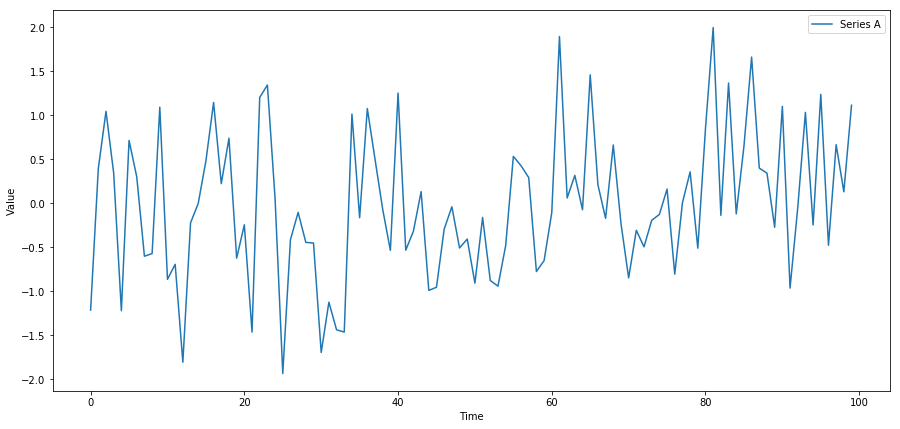

In [25]:
# Set the parameters and the number of datapoints
params = (0, 1)
T = 100

A = pd.Series(index=range(T))
A.name = 'A'

for t in range(T):
    A[t] = generate_datapoint(params)
plt.figure(figsize=(15,7))
plt.plot(A)
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(['Series A'])
plt.show()


Now for an example of a *non-stationary* data series, which increases monotonically as long-term behavior (short term is not necessarily monotonic):

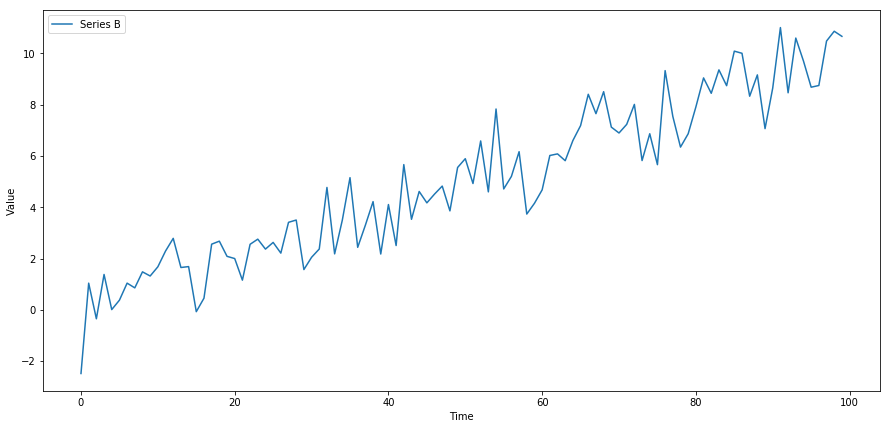

In [26]:
# Set the number of datapoints
T = 100

B = pd.Series(index=range(T))
B.name = 'B'

for t in range(T):
    # Now the parameters are dependent on time
    # Specifically, the mean of the series changes over time
    params = (t * 0.1, 1)
    B[t] = generate_datapoint(params)
plt.figure(figsize=(15,7))
plt.plot(B)
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(['Series B'])
plt.show()

### Why this is important

Many statistical tests, in their assumptions, require that the data being tested be *stationary*. 

A stationary time series (TS) is simpler to predict, as we can assume that future statistical properties are the same or proportional to current statistical properties. If you naively use certain statistics on a non-stationary data set, you will get garbage results!

### Augmented Dickey-Fuller (ADF) test

To check for stationarity, one uses a statistical test: The standard [Augmented Dickey Fuller test](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test).

In [27]:
def check_for_stationarity(X, cutoff=0.01):
    # We must observe significant p-value to convince ourselves that the series is stationary
    pvalue = adfuller(X)[1]
    if pvalue < cutoff:
        print('p-value = ' + str(pvalue) + ' The series ' + X.name +' is likely stationary.')
        return True
    else:
        print('p-value = ' + str(pvalue) + ' The series ' + X.name +' is likely non-stationary.')
        return False

In [28]:
check_for_stationarity(A);
check_for_stationarity(B);

p-value = 9.01816765452541e-14 The series A is likely stationary.
p-value = 0.89642355065836 The series B is likely non-stationary.


### Stock market data

Stock market price data is usually *non-stationary*. However, the delta of the price series (today minus yesterday), called the *additive return*, *is* usually stationary. Multiplicative returns (% change) is *also* usually stationary. Try this out on some stock data.

This means we can run the T and chi tests we learned about on additive and mutliplicative returns, and we can model these much better than price.

Do not assume that because a time series is stationary in the past, that it will continue to be stationary in the future!

Tests for consistency of stationarity are *necessary*. This is true of any statistical property. Returns may also go in and out of stationarity, and may be stationary or non-stationary depending on the timeframe and sampling frequency.


### Moving average representation (ARIMA)

Read [here](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average) for ARIMA models. This representation expresses any time series $Y_t$ as

$$Y_t = \sum_{j=0}^\infty b_j \epsilon_{t-j} + \eta_t$$

$\epsilon$ is the residuals, or errors - a stochastic white noise process. 

$b_j$ are the moving average weights of residuals.

$\eta$ is a deterministic series. (e.g. a sine wave), something we could perfectly model. The difference between predictions from this model ($\eta$) and actual observations leads to residuals($\epsilon$). The residuals are *stochastic* and there to simulate *new* information occuring over time.

Specifically, $\epsilon_t = \hat Y_t - Y_t$ where $\hat Y_t$ is the in the optimal forecast of $Y_t$(actual observed value) using only information from time before $t$. In other words, the best prediction you can make at time $t-1$ cannot account for the randomness in $\epsilon$.

Each $b_j$ just says how much previous values of $\epsilon$ influence $Y_t$.

### Order of Integration

A time series is said to be $I(0)$ if the following condition holds in a moving average representation: In simpler terms, the autocorrelation of the series decays to 0 sufficiently quickly.

$$\sum_{k=0}^\infty |b_k|^2 < \infty$$

This property turns out to be true of all stationary series since autocorrelation is 0, but by itself is not enough for stationarity to hold. This means that stationarity implies $I(0)$, but $I(0)$ does not imply stationarity.

[Order of integration](https://en.wikipedia.org/wiki/Order_of_integration) is a very important property in statistics. But a tricky one. In practice testing whether the sum of the autocorrelations is finite may not be possible!

It is possible in a mathematical derivation, but when we have a *finite* set of data and a *finite* number of estimated autocorrelations, the sum will always be *finite*! Given this difficulty, tests for $I(0)$ rely on stationarity implying the property. If we find that a series is stationary, then it must also be $I(0)$.

If one takes an $I(0)$ series and cumulatively sums it (discrete integration), the new series will be $I(1)$. Notice how this is related to the calculus concept of integration. The same relation applies in general, to get $I(n)$ take an $I(0)$ series and iteratively take the cumulative sum $n$ times.

Let's take our original stationary series A. Because A is stationary, we know it's also $I(0)$. Now let's make an $I(1)$ series by taking the cumulative sum of A.

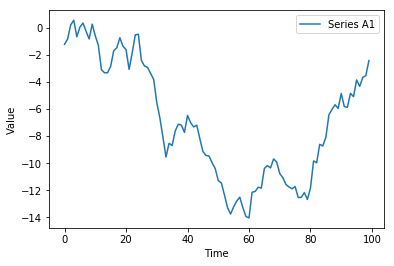

In [29]:
A1 = np.cumsum(A)

plt.plot(A1)
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(['Series A1'])
plt.show()

Doesn't look stationary, does it? But that's ok, because all we care about is A, and A is $I(0)$.

### MCMC-Modeling stationary time series

Stationarity is extremely important, and oftentimes only assumed in the fine print of notebooks. That is why **before you run any kind of statistical test or Bayesian estimation, you test for stationarity**.

Stationary time series can be MCMC-modelled with posterior distributions. To prove this, let's model volatility of the [S&P 500](https://en.wikipedia.org/wiki/S%26P_500_Index), a typical stationary time series that yields averages of a selected subset of [blue-chip stocks](https://www.investopedia.com/ask/answers/031915/what-benefit-investing-blue-chip-stocks.asp).

Asset prices have time-varying volatility (variance of day over day returns). In some periods, returns are highly variable, while in others very stable. Stochastic volatility models this with a latent (hidden) volatility variable, modeled as a stochastic process. The following model is similar to the one described in the [No-U-Turn Sampler paper, Hoffman (2011)](https://arxiv.org/abs/1111.4246) p21.

$\sigma \sim Exponential(50)$

$\nu \sim Exponential(.1)$

$s_i \sim Normal(s_{i-1}, \sigma^{-2})$

$log(r_i) \sim t(\nu, 0, exp(-2 s_i))$

Here, $r$ is the daily return series and $s$ is the latent log volatility process.

We load some daily returns of the S&P 500. As you can see, the volatility seems to change over time quite a bit but clusters around certain time-periods. Around time-points 2500-3000 you can see the 2009 financial crash.

In [30]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')
import pymc3 as pm
from pymc3.distributions.timeseries import GaussianRandomWalk

from scipy import optimize

In [31]:
n = 400
returns = np.genfromtxt(pm.get_data("SP500.csv"))
returns[:5]

array([ 0.002081, -0.010736, -0.002669, -0.008246, -0.029663])

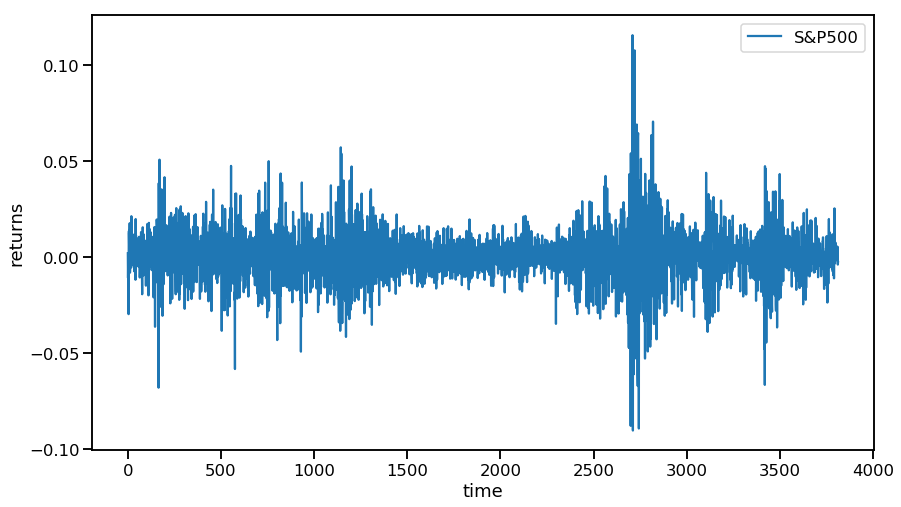

In [32]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(returns, label='S&P500')
ax.set(xlabel='time', ylabel='returns')
ax.legend();

Specifying the model in PyMC3 mirrors its statistical specification. You *always* use a [Student-T distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution) for financial data, because financial data has heavier tails, meaning that it is more prone to producing values that fall far from the mean.

In [33]:
with pm.Model() as model:
    step_size = pm.Exponential('sigma', 50.)
    s = GaussianRandomWalk('s', sd=step_size,
                           shape=len(returns))

    nu = pm.Exponential('nu', .1)

    r = pm.StudentT('r', nu=nu,
                    lam=pm.math.exp(-2*s),
                    observed=returns)

The [NUTS](https://stats.stackexchange.com/questions/331206/what-is-no-u-turn-sampler) algorithm yields the correct posterior. This simulation took about 30 mns to run on my [NVIDIA](https://en.wikipedia.org/wiki/Nvidia) 1070 [GPGPU](https://en.wikipedia.org/wiki/General-purpose_computing_on_graphics_processing_units) laptop. Go [here](https://www.codeproject.com/Articles/1158306/Theano-Machine-Learning-on-a-GPU-on-Windows) to read about what I do on my laptop ;-)

In [34]:
with model:
    trace = pm.sample(tune=2000, nuts_kwargs=dict(target_accept=.9))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu, s, sigma]
Sampling 4 chains: 100%|██████████| 10000/10000 [11:46<00:00,  3.93draws/s]
/Users/BumbleBee/anaconda3/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)
The gelman-rubin statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


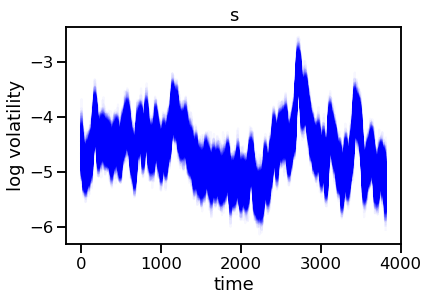

In [35]:
fig, ax = plt.subplots()

plt.plot(trace['s'].T, 'b', alpha=.03);
ax.set(title=str(s), xlabel='time', ylabel='log volatility');

Looking at the returns over time and overlaying the estimated standard deviation, we can see how the model tracks volatility over time.

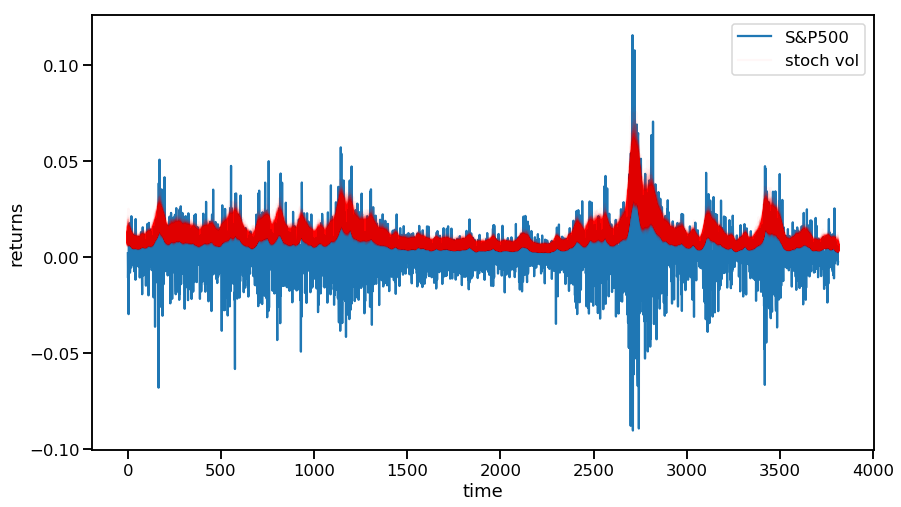

In [36]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(returns)
ax.plot(np.exp(trace[s].T), 'r', alpha=.03);
ax.set(xlabel='time', ylabel='returns')
ax.legend(['S&P500', 'stoch vol']);

Ok, so what we demonstrated here is that assuming a *Student-t* probability density function, the standard for financial time series, we can match that distribution's posterior to the S&P 500 volatility estimate, a typical stationary process, with good precision. Once you have that, you can throw away the S&P 500 dataset because you have a good analytic model of its behavior, and this just because of the stationarity condition.

### Cointegration

And now we finally get to the mathematical concept underlying pairs trading.

A linear combination of the time series ($X_1$, $X_2$, $\dots$, $X_k$) is a *new* time series $Y$ constructed as follows for any set of real numbers $b_1 \dots b_k$:

$$Y = b_1X_1 + b_2X_2 + \dots + b_kX_k$$


For some set of time series ($X_1$, $X_2$, $\dots$, $X_k$), if all series are $I(1)$, and some linear combination of them is $I(0)$, we say the set of time series is [*cointegrated*](https://en.wikipedia.org/wiki/Cointegration).

For example, if $X_1$, $X_2$, and $X_3$ are all $I(1)$, and $2X_1 + X_2 + 0X_3 = 2X_1 + X_2$ is $I(0)$. In this case the time series are cointegrated.

Essentially what we're saying is that for some linear combination of the series, the result lacks much auto-covariance and is mostly *noise*. 



### Pairs Trading

And now we introduce [*pairs trading*](https://en.wikipedia.org/wiki/Pairs_trade).

<center>
<img src = "ipynb.images/quant.jpg" width = 400 />
</center>

<br />

In pairs trading, quants find two assets whose prices are cointegrated. Since the linear combination of their prices $b_1A_1 + b_2A_2$ is noise, they bet on the mean of the relationship $b_1A_1 + b_2A_2$ as being *reverting* (being sometimes positive, sometimes negative) and place trades accordingly.

Let's generate two datasets to demonstrate this, where the 2nd dataset is the first plus some normally distributed noise.

In [37]:
# Length of series
N = 100

# Generate a stationary random X1
X1 = np.random.normal(0, 1, N)
# Integrate it to make it I(1)
X1 = np.cumsum(X1)
X1 = pd.Series(X1)
X1.name = 'X1'

# Make an X2 that is X1 plus some noise
X2 = X1 + np.random.normal(0, 1, N)
X2.name = 'X2'

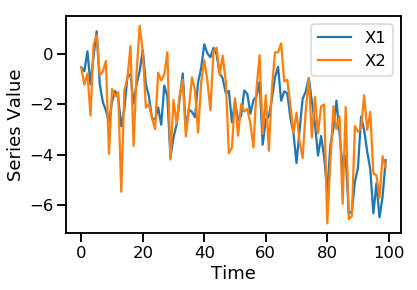

In [38]:
plt.plot(X1)
plt.plot(X2)
plt.xlabel('Time')
plt.ylabel('Series Value')
plt.legend([X1.name, X2.name])
plt.show()

Because $X_2$ is just an $I(0)$ series plus some stationary noise, it should still be $I(0)$. Let's check this.

In [39]:
Z = X2.diff()[1:]
Z.name = 'Z'

check_for_stationarity(Z);

p-value = 3.5134204387153397e-09 The series Z is likely stationary.


Now to show cointegration we need to find some linear combination of $X_1$ and $X_2$ that is stationary. Let's take $X_2-X_1$. Is all that's left over, stationary noise?

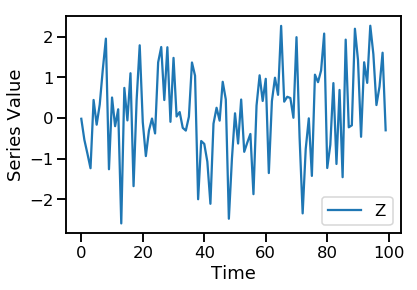

p-value = 1.1470733967659902e-14 The series Z is likely stationary.


In [40]:
Z = X2 - X1
Z.name = 'Z'

plt.plot(Z)
plt.xlabel('Time')
plt.ylabel('Series Value')
plt.legend(['Z'])
plt.show()

check_for_stationarity(Z);

Ok, that worked!

### Testing for cointegration


There are a number of ways to test for [cointegration](https://en.wikipedia.org/wiki/Cointegration). In general we're just trying to solve for the coefficients $b_1, \dots b_k$ that will produce an $I(0)$ linear combination. If that reminds you of linear algbera, it is :-)

If our best guess for these coefficients does not pass a stationarity check, then we reject the hypothesis that the set is cointegrated. This will lead to risk of Type II errors (false negatives), as we will not exhaustively test for stationarity on all coefficent combinations. However Type II errors may be ok if they do not lead you to make wrong forecasts.

Now go to [yahoo finance/MSFT](https://finance.yahoo.com/quote/MSFT) to download historical quotes for Microsoft, and  [yahoo finance/ADBE](https://finance.yahoo.com/quote/ADBE) to download historical quotes for Adobe, from Jul 1 2011, to Jul 1 2018.

In [41]:
import pandas as pd
msft = pd.read_csv('data/MSFT.csv',index_col=0,parse_dates=True)
adbe = pd.read_csv('data/ADBE.csv',index_col=0,parse_dates=True) 
msft.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-07-01,25.930000,26.170000,25.840000,26.020000,21.657114,52906200
2011-07-05,26.100000,26.150000,25.900000,26.030001,21.665436,37805300
2011-07-06,25.969999,26.370001,25.959999,26.330000,21.915133,48744200
2011-07-07,26.490000,26.879999,26.360001,26.770000,22.281363,51946500
2011-07-08,26.540001,26.980000,26.510000,26.920000,22.406210,58320700


In [42]:
X1 = msft['High']
X2 = adbe['High']

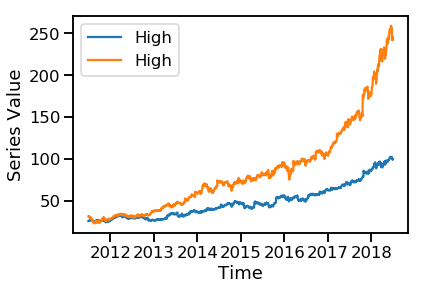

In [43]:
plt.plot(X1)
plt.plot(X2)
plt.xlabel('Time')
plt.ylabel('Series Value')
plt.legend([X1.name, X2.name])
plt.show()

Ok, looks linear up to around 2017, and then not. I'm worried..

Let's use a very simple linear regression (least squares, from `statsmodels`) to compute $\beta$, the linear fit coefficient.

In [44]:
X1 = sm.add_constant(X1)
results = sm.OLS(X2, X1).fit()

# Get rid of the constant column
X1 = msft['High']

results.params


const   -46.315245
High      2.700152
dtype: float64

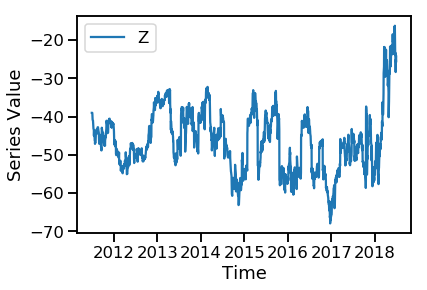

p-value = 0.02617556569634689 The series Z is likely non-stationary.


In [45]:
beta = results.params['High']
Z = X2 - beta * X1
Z.name = 'Z'

plt.plot(Z.index, Z.values)
plt.xlabel('Time')
plt.ylabel('Series Value')
plt.legend([Z.name])
plt.show()

check_for_stationarity(Z);

Aaaaarghhh!! We can see that the resulting $Z$ is likely *not* stationary over the time frame we looked at. And this makes sense because Microsoft is doing substantially better in 2018 than Adobe is. So either restrict the time interval or look for another stock pairing..

Ok, since (MSFT, ADBE) is not working as a trading pair, let me pull the *professor* card here, and generate *fake* data.

I'll model X's daily returns by drawing from a normal distribution, and then perform a cumulative sum to get the value of X on each day. Then generate Y, with an economic link to X so the price of Y varies similarly with X. I do this by taking X, shifting it up and adding some random noise drawn from a normal distribution.

Then we verify cointegration: The expected value of the ratio over time must converge to the mean. We want p-values below 0.2.

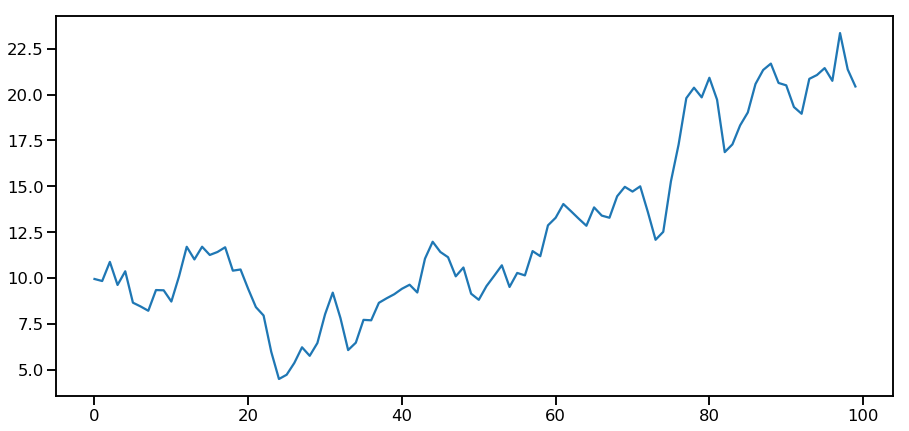

In [46]:
from statsmodels.tsa.stattools import coint
# just set the seed for the random number generator
np.random.seed(21)


# Generate daily returns
Xreturns = np.random.normal(0, 1, 100) 

# sum them and shift all the prices up
X = pd.Series(np.cumsum(Xreturns), name='X') + 10

X.plot(figsize=(15,7))
plt.show()

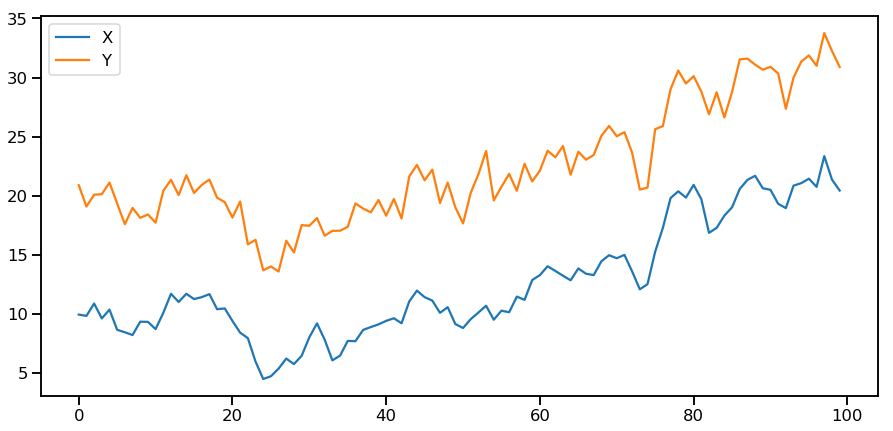

In [47]:
noise = np.random.normal(0, 1, 100)
Y = X + 10 + noise
Y.name = 'Y'
pd.concat([X, Y], axis=1).plot(figsize=(15,7))
plt.show()

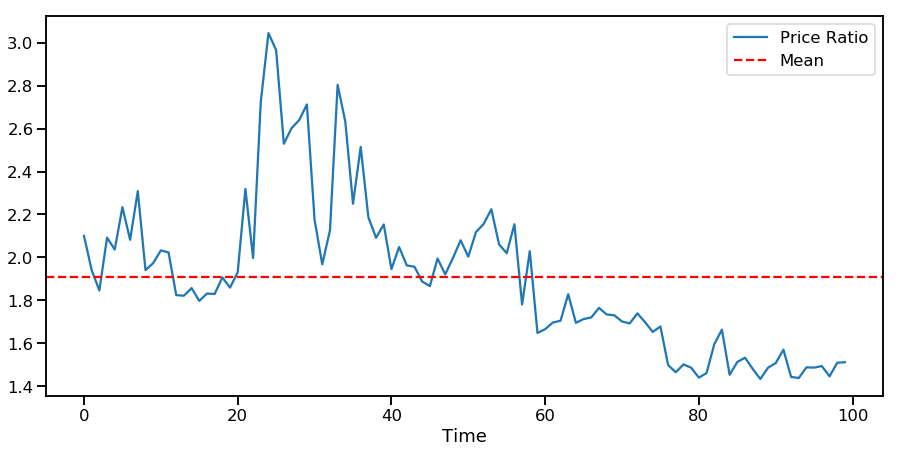

In [48]:
(Y/X).plot(figsize=(15,7)) 
plt.axhline((Y/X).mean(), color='red', linestyle='--') 
plt.xlabel('Time')
plt.legend(['Price Ratio', 'Mean'])
plt.show()

In [49]:
# compute the p-value of the cointegration test
# will inform us as to whether the ratio between the 2 timeseries is stationary
# around its mean
score, pvalue, _ = coint(X,Y)
score, pvalue

(-9.504843836319505, 4.4725395264247325e-15)

Because two cointegrated time series (such as $X$ and $Y$ above) drift towards and apart from each other, there will be times when the spread is *high*, and times when the spread is *low*. So we make a pairs trade by buying one security and selling another at the opportune times. This way, if both securities go down together or go up together, we neither make nor lose money — we remain market neutral.

Going back to X and Y above with the constraint $Y = ⍺ X + e$, such that ratio $Y/X$ moves around it’s mean value $⍺$, we can make money on the ratio of the two reverting to the mean. In order to do this we’ll watch for when $X$ and $Y$ drift far apart, i.e $⍺$ is too high or too low:

* Going [Long](https://en.wikipedia.org/wiki/Long_(finance): This is when the ratio $⍺$ is smaller than usual and we expect it to increase. In the above example, we place a bet on this by buying $Y$ and selling $X$.

* Going [Short](https://en.wikipedia.org/wiki/Short_(finance): This is when the ratio $⍺$ is large and we expect it to become smaller. In the above example, we place a bet on this by selling $Y$ and buying $X$.

Note that we always have a [hedged position](https://en.wikipedia.org/wiki/Hedge_(finance): a *short* position makes money if the security sold loses value, and a *long* position will make money if a security gains value, so we’re immune to overall market movement. We only make or lose money if securities $X$ and $Y$ move relative to each other.

Read the links in this cell. They'll help you understanding how a stock market functions.

### Careful about multiple comparison bias

Note that if you start pairing many stocks and perform statistical tests over all pairs, you’ll fall prey to [multiple comparison bias](https://en.wikipedia.org/wiki/Multiple_comparisons_problem).

Multiple comparisons bias is simply the fact that there is an increased chance to incorrectly generate a significant [p-value](https://en.wikipedia.org/wiki/P-value) when many tests are run, because you are running a lot of tests. If 100 tests are run on random data, you should expect to see 5 p-values below 0.05. If you are comparing $n$ securities for co-integration, you will perform $n(n-1)/2$ comparisons, and you should expect to see many incorrectly significant p-values, which will increase as you increase the amount of pairs (false positives). 

To avoid multiple comparisons bias, pick a small number of pairs you have reason to suspect might be cointegrated and test each individually.

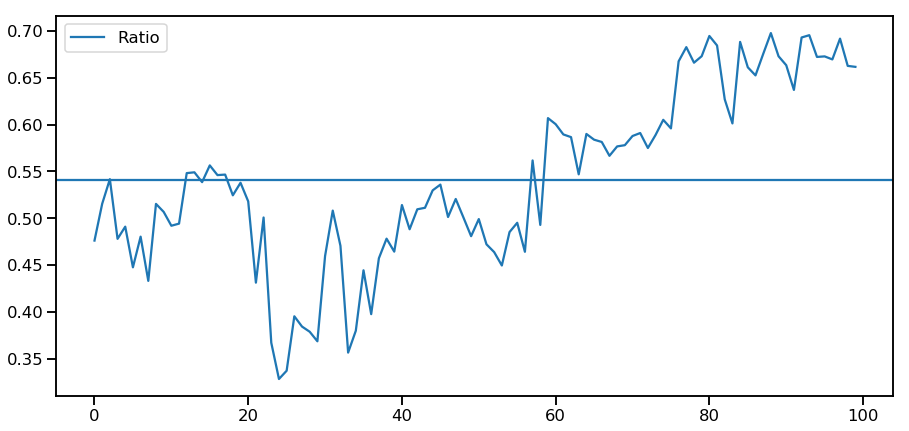

In [50]:
ratios = X / Y
ratios.plot(figsize=(15,7))
plt.axhline(ratios.mean())
plt.legend(['Ratio'])
plt.show()

The ratio looks like it moved around a stable mean.The absolute ratio isn’t very useful in statistical terms. It is more helpful to normalize our signal by treating it as a [z-score](https://en.wikipedia.org/wiki/Standard_score). Z score is defined as:

Z Score (Value) = (Value - Mean) / Standard Deviation

Note that In practice this is usually done to try to give some scale to the data, but this assumes an underlying distribution. Usually normal. However, much financial data is not normally distributed, and we must be very careful not to simply assume normality, or any specific distribution when generating statistics. The true distribution of ratios could be very fat-tailed and prone to extreme values messing up our model and resulting in large losses.

In [51]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

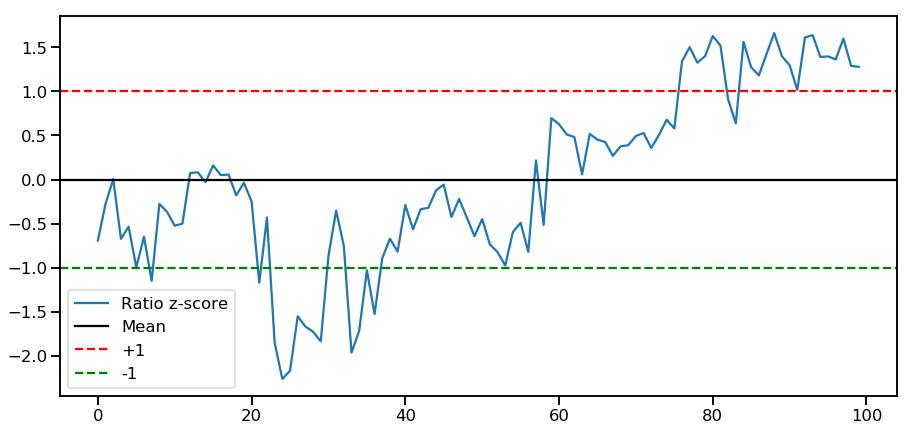

In [52]:
zscore(ratios).plot(figsize=(15,7))
plt.axhline(zscore(ratios).mean(), color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Ratio z-score', 'Mean', '+1', '-1'])
plt.show()

### Simple Pairs trading Strategy

* Go "Long" the ratio whenever the z-score is below -1.0
* Go "Short" the ratio when the z-score is above 1.0
* Exit positions when the z-score approaches zero

This is just the tip of the iceberg, and only a very simplistic example to illustrate the concepts.

In practice you would want to compute a more optimal weighting for how many shares to hold for S1 and S2
You would also want to trade using constantly updating statistics.

In general taking a statistic over your whole sample size can be bad. For example, if the market is moving up, and both securities with it, then your average price over the last 3 years may not be representative of today. For this reason traders often use statistics that rely on rolling windows of the most recent data.



### Spread-based trading strategy

If $X_t$ and $Y_t$ are cointegrated stocks, then spread = $\log(Y_t) - (\alpha + \beta \log(X_t))$

If the spread is very high, buy $X_t$, sell $Y_t$. If the spread is very low, buy $Y_t$, sell $X_t$.

So, find two likely cointegrated stocks, estimate spreads, check stationarity, create trading signal, verify.


### Other prebuilt tests for cointegration




There are other pre-built tests for cointegration, see [here](http://www.statsmodels.org/devel/_modules/statsmodels/tsa/stattools.html). One test is called the [Phillips-Perron Unit Root Test](https://en.wikipedia.org/wiki/Phillips%E2%80%93Perron_test). Another one is the [Johansen test](https://en.wikipedia.org/wiki/Johansen_test).

In [53]:
from statsmodels.tsa.stattools import coint

coint(X1, X2)

(-3.2898284253568866,
 0.05614549015852855,
 array([-3.90267349, -3.33960385, -3.04686065]))

### Your work

Ok, so this was your introduction to *algorithmic trading*. The kind of data science econometrics quants exercise in NYC, where they make million dollar salaries doing it. Thought you would be interested by that :-)

Now, on to what *you* have to do for your *midterm*.

Your job is to prove you can make good money from pairs trading, by looking at a 10-year window, training your model for the first 7 years, and then pair trading for the next three, and tallying up gains. You may pick your window, but it's more interesting for you if it's 2008-2018, right?

Your grade will be predicated on a combination of elegance, simplicity and sophistication of your trading algorithm, but also, like the World Cup, how much money you make in the last 3 testing years compared to the rest of the class :-)

Be careful about [data leakage](https://medium.com/@michalillich/how-google-s-financial-predictor-predicts-the-past-58dc4d644703). Don't pollute your training data with future data, invalidating your model. Don't match your model too close to the training years (that's called [overfitting](https://elitedatascience.com/overfitting-in-machine-learning) your data); that will make your model perform poorly in the test years.

Find a good strategy for locating pairs that is not victim to comparison bias.

Model as much data as you can with posterior distributions, instead of relying on data points. Yes, that means MCMC-modeling as much as possible.

Remember as with anything else, you should not assume that because some set of assets have passed a cointegration test historically, that they will continue to remain cointegrated. You need to verify that consistent behavior occurs, and use various model validation techniques as you would with any model. Recall MSFT and ADBE. Historically considered a cointegrated pair, 2018 proved everyone wrong!

An important consideration in finance is to make many independent bets. Here a quant would find many pairs of assets they hypothesize are cointegrated, and evenly distribute their dollars between them in bets. And then this only requires more than half of the asset pairs to remain cointegrated for the strategy to work.

And finally, you are not Leonardo DiCaprio (yet). So, don't try too hard to make millions of dollars. Play it safe.

<br />

<center>
<img src = "ipynb.images/wolf-of-wall-street.jpg" width = 400 />
</center>

<br />

### Hints

Here's how to download financial data straight into a pandas notebook, which should facilitate your research :-)

In [54]:
import numpy as np
import pandas as pd

import statsmodels
from statsmodels.tsa.stattools import coint
import statsmodels.api as sm
# just set the seed for the random number generator
np.random.seed(107)

import matplotlib.pyplot as plt
import datetime
from pandas_datareader import data as pdr
import pymc3 as pm
from pymc3.distributions.timeseries import GaussianRandomWalk

Download data of Google,Amazon,Microsoft and Apple

In [55]:
start = datetime.datetime(2008, 1, 1)
end = datetime.datetime(2015, 1, 1)
stocks = ['GOOG','AMZN','MSFT', 'AAPL']

# morningstar, nasdaq, and quandl are source options
# to see all options, go here: https://github.com/pydata/pandas-datareader/blob/master/pandas_datareader/data.py
df = []
for i in range(4):
    df.append(pdr.get_data_yahoo(stocks[i], start, end))

df[0].head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2008-01-02,346.431793,336.675262,344.196320,340.381134,8669700.0,340.381134
2008-01-03,341.205780,336.074158,340.415924,340.450684,6547200.0,340.450684
2008-01-04,338.279816,325.383698,337.648926,326.377228,10789200.0,326.377228
2008-01-07,329.000183,316.615723,324.857117,322.527283,12890000.0,322.527283
2008-01-08,327.847656,313.461243,324.390167,313.799042,10747500.0,313.799042


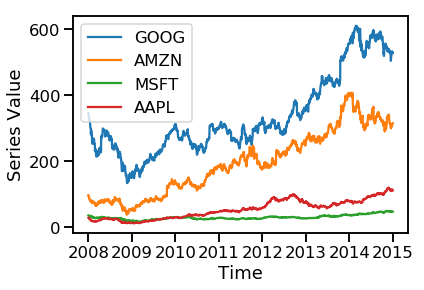

In [56]:
X1 = df[0]['High']
X2 = df[1]['High']
X3 = df[2]['High']
X4 = df[3]['High']
plt.plot(X1)
plt.plot(X2)
plt.plot(X3)
plt.plot(X4)
plt.xlabel('Time')
plt.ylabel('Series Value')
plt.legend(['GOOG','AMZN','MSFT','AAPL'])
plt.show()

Google and Amazon may be cointegrated stocks

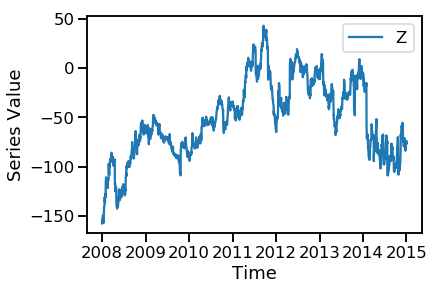

p-value = 0.03108181981371617 The series Z is likely stationary.


In [57]:
X1 = sm.add_constant(X1)
results = sm.OLS(X2, X1).fit()

# Get rid of the constant column
X1 = df[0]['High']

results.params

beta = results.params['High']
Z = X2 - beta * X1
Z.name = 'Z'

plt.plot(Z.index, Z.values)
plt.xlabel('Time')
plt.ylabel('Series Value')
plt.legend([Z.name])
plt.show()

#extend p-value limit to 0.05
check_for_stationarity(Z,0.05);

In [58]:
score, pvalue, _ = coint(X1,X2)
score, pvalue

(-2.8239377308092206, 0.1581869688999341)

pvalue < 0.2 seems good

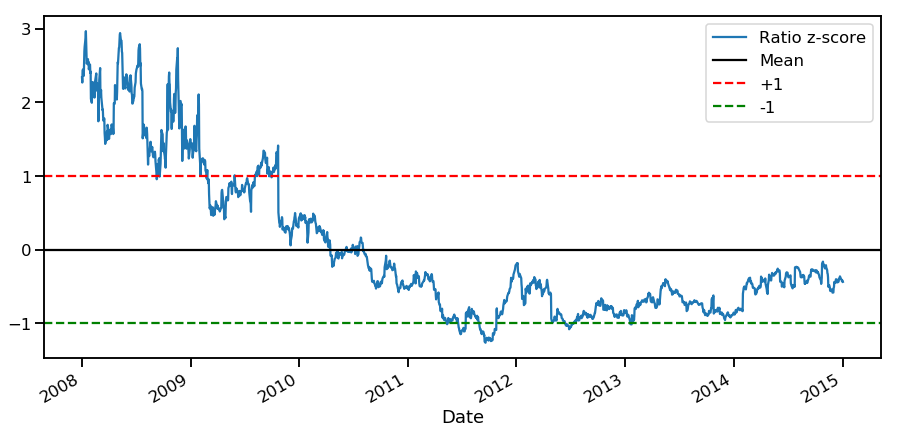

In [59]:
ratios = X1 / X2
zscore(ratios).plot(figsize=(15,7))
plt.axhline(zscore(ratios).mean(), color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Ratio z-score', 'Mean', '+1', '-1'])
plt.show()

The data start from 2011 is better

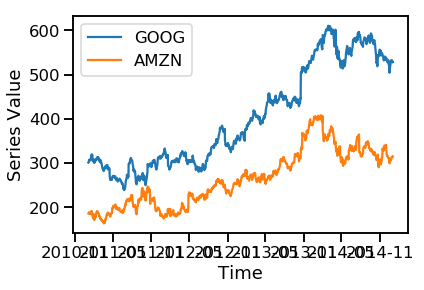

In [60]:
start1 = datetime.datetime(2011, 1, 1)
df1=[]
for i in range(2):
    df1.append(pdr.get_data_yahoo(stocks[i], start1, end))
X1 = df1[0]['High']
X2 = df1[1]['High']
plt.plot(X1)
plt.plot(X2)
plt.xlabel('Time')
plt.ylabel('Series Value')
plt.legend(['GOOG','AMZN'])
plt.show()

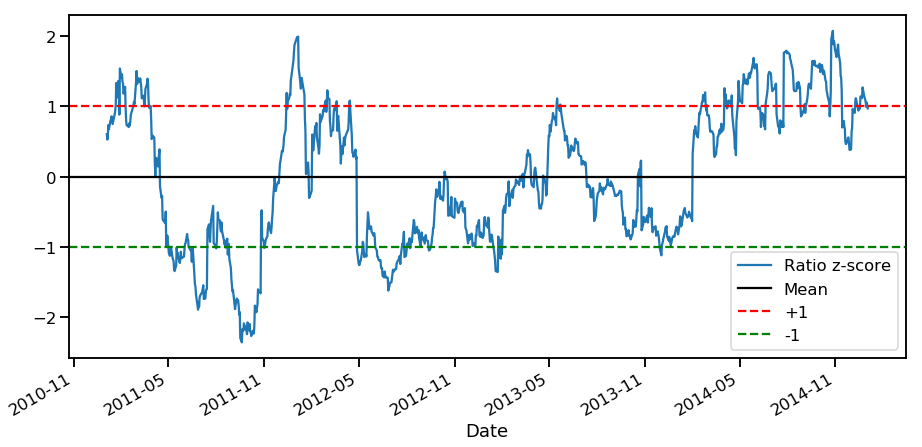

In [61]:
ratios = X1 / X2
zscore(ratios).plot(figsize=(15,7))
plt.axhline(zscore(ratios).mean(), color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Ratio z-score', 'Mean', '+1', '-1'])
plt.show()

MCMC-Modeling:

In [62]:
returns = ratios

with pm.Model() as model:
    step_size = pm.Exponential('sigma', 50.)
    s = GaussianRandomWalk('s', sd=step_size,
                           shape=len(returns))

    nu = pm.Exponential('nu', .1)

    r = pm.StudentT('r', nu=nu,
                    lam=pm.math.exp(-2*s),
                    observed=returns)

In [63]:
with model:
    trace = pm.sample(tune=2000, nuts_kwargs=dict(target_accept=.9))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu, s, sigma]
Sampling 4 chains: 100%|██████████| 10000/10000 [10:12<00:00,  4.46draws/s]
/Users/BumbleBee/anaconda3/lib/python3.7/site-packages/mkl_fft/_numpy_fft.py:1044: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.rfftn_numpy(a, s, axes)
The acceptance probability does not match the target. It is 0.7499286460059618, but should be close to 0.9. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The acceptance probability does not match the target. It is 0.791053272095276, but should be close to 0.9. Try to increase the

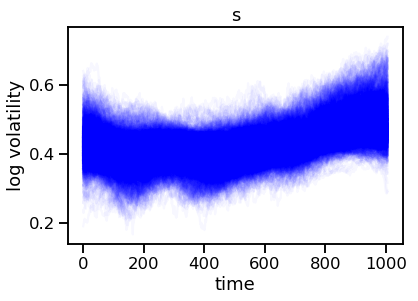

In [64]:
fig, ax = plt.subplots()

plt.plot(trace['s'].T, 'b', alpha=.03);
ax.set(title=str(s), xlabel='time', ylabel='log volatility');

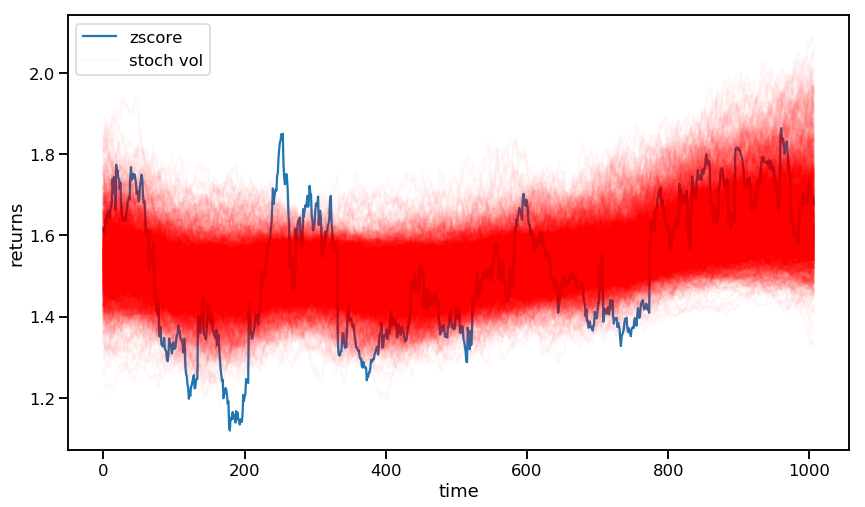

In [65]:
fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(returns.values)
ax.plot(np.exp(trace[s].T), 'r', alpha=.03);
ax.set(xlabel='time', ylabel='returns')
ax.legend(['zscore', 'stoch vol']);

approximately a stationarity condition

Use Spread-based trading strategy

In [66]:
df1[0]['Log'] = np.log(df1[0]['High'])
df1[1]['Log'] = np.log(df1[1]['High'])

LX1 = df1[0]['Log']
LX2 = df1[1]['Log']

LX1 = sm.add_constant(LX1)
results = sm.OLS(LX2, LX1).fit()
LX1 = df1[0]['Log']

results.params

const    0.858684
Log      0.787214
dtype: float64

Build spread with fit result

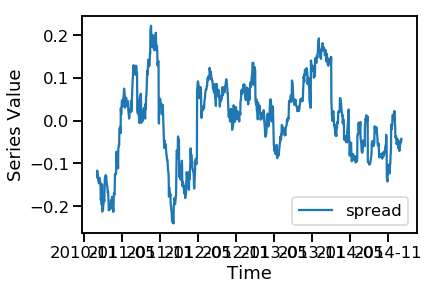

In [67]:
const = results.params['const']
beta = results.params['Log']
spread =  LX2 - (const+beta*LX1)
spread.name = 'spread'

plt.plot(spread.index, spread.values)
plt.xlabel('Time')
plt.ylabel('Series Value')
plt.legend([spread.name])
plt.show()

In [68]:
# start with hold 10000 X1 and 10000 X2
hold = [10000,10000]
asset = X1[0]*hold[0]+X2[0]*hold[1]

for i in range(len(X1)):
    if spread[i] > 0.1:
        # buy X1, sell X2
        hold[1] -=50
        hold[0] +=50*X2[i]/X1[i]
    elif spread[i] < -0.1:
        # buy X2, sell X1
        hold[0] -=50
        hold[1] +=50*X1[i]/X2[i]

#asset = X1[len(X1)-1]*10000+X2[len(X1)-1]*10000
asset1 = X1[len(X1)-1]*hold[0]+X2[len(X1)-1]*hold[1]
Yield = asset1 / asset - 1
Yield / 5

0.1759306940464851

This strategy can make profit(15% per year)

For the latest 3 years:

In [69]:
start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2018, 1, 1)
stocks = ['GOOG','AMZN']

# morningstar, nasdaq, and quandl are source options
# to see all options, go here: https://github.com/pydata/pandas-datareader/blob/master/pandas_datareader/data.py
df2 = []
for i in range(2):
    df2.append(pdr.get_data_yahoo(stocks[i], start, end))

NX1 = df2[0]['High']
NX2 = df2[1]['High']

df2[0]['Log'] = np.log(df2[0]['High'])
df2[1]['Log'] = np.log(df2[1]['High'])

NLX1 = df2[0]['Log']
NLX2 = df2[1]['Log']

Nspread =  NLX2 - (const+beta*NLX1)

hold = [10000,10000]
asset = NX1[0]*hold[0]+NX2[0]*hold[1]

for i in range(len(NX1)):
    if Nspread[i] > 0.1:
        hold[1] -=10
        hold[0] +=10*NX2[i]/NX1[i]
    elif Nspread[i] < -0.1:
        hold[0] -=10
        hold[1] +=10*NX1[i]/NX2[i]
    
#asset = NX1[len(NX1)-1]*10000+NX2[len(NX1)-1]*10000
asset1 = NX1[len(NX1)-1]*hold[0]+NX2[len(NX1)-1]*hold[1]
Yield = asset1 / asset - 1
Yield / 3

0.5058732760368327

The strategy works well(earn 51% profit per year)